@author: Israr Ahmad

### <font color='black'> What is Churn?
Churn in a business setting refers to losing an acquired, potentially profitable customer. The definition of churn can vary by industry ( in Healthcare, dead people are considered churn while in finance, people with inactive cards are called churned).

### <font color='black'> Why do businesses want to prevent churn?
Acquiring a new customer is always more expensive than retaining an existing one. Hence, not letting them churn is the key to a sustained revenue stream.
    
I want to predict which customer will leave the company or churn in the future.
    
This problem is a binary classification, the formula for this is: <font color='blue'>${g(x_i)}\approx{y_i}$ 
    
<font color='blue'>$x_i$</font><font color='black'>could be feature vector describing cutomer details like ID etc.

<font color='blue'>$y_i$</font><font color='black'> is the value I will target
    
So, in this case  <font color='blue'>$y_i \in \{0, 1\}$
    
<font color='blue'>$0$</font><font color='black'> is negative churn (means the customer won't leave), and <font color='blue'>$1$ <font color='black'>is positive churn 

#### <font color='orangered'>Start with impoting necessary liberaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Path of dataset
path = 'Churn-prediction.csv'

In [3]:
# Loadiing Dataset with Pandas
df=pd.read_csv(path)
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [4]:
# Checking missing values for each column
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# <font color='blue'>Data Preprocessing</font>

The names of columns are not unifromed as some are in capital and some starting with lower case, therefore, I am uniforming the columns names to a static format of small letters with no space.

In [5]:
df.columns=df.columns.str.lower().str.replace(" ", "_")

In [6]:
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

Similarly I am converting categorical varibles into small letter with no space

In [7]:
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

In [8]:
for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(" ","_")
    

In [9]:
df.head(5)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.5,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,yes


In [10]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

<font color='blue'> totalcharges</font> type is object in this dataset but it should be numeric.

In [11]:
tc = pd.to_numeric(df.totalcharges, errors='coerce')

In [12]:
# Checking the missing values 
df[tc.isnull()][['customerid', 'totalcharges']]

,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


In [13]:
df.totalcharges=pd.to_numeric(df.totalcharges, errors='coerce')

There are some missing values in the <font color='blue'>totalcharges</font> column, I am filling with <font color='blue'>0s</font>. 

In [14]:
df.totalcharges = df.totalcharges.fillna(0)

In [15]:
df[tc.isnull()][['customerid', 'totalcharges']]

,customerid,totalcharges
488,4472-lvygi,0.0
753,3115-czmzd,0.0
936,5709-lvoeq,0.0
1082,4367-nuyao,0.0
1340,1371-dwpaz,0.0
3331,7644-omvmy,0.0
3826,3213-vvolg,0.0
4380,2520-sgtta,0.0
5218,2923-arzlg,0.0
6670,4075-wkniu,0.0


In [16]:
#Commiting chages to DataFrame
df.totalcharges=pd.to_numeric(df.totalcharges, errors='coerce')

In [17]:
df.churn.head()

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

In [18]:
(df.churn=='yes').astype(int).head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int32

In [19]:
df.churn = (df.churn == 'yes').astype(int)

# <font color='blue'>Data Split</font>

I am performing datasplit using SciKitLearn function

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
#train_test_split?

Here I am converting the dataset in to two sections, basically I am subtracting <font color='blue'>20%</font> data from the whole data. 

In [22]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [23]:
len(df_full_train), len(df_test)

(5634, 1409)

Now I need to make another split for the validation, as I have already splited data into test and training sections. I will make one more split from the training data. Simply I can write <font color ='blue'>0.2</font> for that as well but I need to split $20\%$ of remaning $80\%$. I am calculating it.

<font color='blue'>$ \frac{20%}{80%}$</font>  $\Longrightarrow$ <font color ='blue'>$\frac{1}{4}$</font> = <font color='blue'> 25%




In [24]:
df_full_train, df_val= train_test_split(df_full_train, test_size=0.25, random_state=1)

In [25]:
len(df_full_train), len(df_test), len(df_val)

(4225, 1409, 1409)

Now, I have <font color='blue'>60%</font> data for training, <font color='blue'>20%</font> for validataion and <font color='blue'>20%</font> for testing. 

In [26]:
df_train = df_full_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

Before doing <font color='blue'>y</font> variable, I want to reset the indexes, it is not necessary but I personally think that it is nicer to reset indexes for reshuffle. 

In [27]:
df_full_train.head(2)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
3897,8015-ihcgw,female,0,yes,yes,72,yes,yes,fiber_optic,yes,...,yes,yes,yes,yes,two_year,yes,electronic_check,115.50,8425.15,0
1980,1960-uycnn,male,0,no,no,10,yes,yes,fiber_optic,no,...,yes,no,no,yes,month-to-month,yes,electronic_check,95.25,1021.55,0


In [28]:
df_test.head(2)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,8879-zkjof,female,0,no,no,41,yes,no,dsl,yes,...,yes,yes,yes,yes,one_year,yes,bank_transfer_(automatic),79.85,3320.75,0
1,0201-mibol,female,1,no,no,66,yes,yes,fiber_optic,yes,...,no,no,yes,yes,two_year,yes,bank_transfer_(automatic),102.40,6471.85,0


In [29]:
# Extracting y variable from splited sections
y_train = df_full_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

I always delete the <font color='blue'>y</font>  variable from the spliting sections, so I don't accidently use it in training. <font color='blue'>(I am only deleting it from the splited section not from the original DataFrame)</font>


In [30]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

# <font color='blue'>EDA</font> 

#### <font color='orangered'>Explonatory Data Analysis</font>

In [31]:
df_full_train= df_full_train.reset_index(drop=True)

In [32]:
#Checking the missing values if any
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [33]:
df_full_train.churn.value_counts

<bound method IndexOpsMixin.value_counts of 0       0
1       0
2       1
3       0
4       0
       ..
4220    0
4221    0
4222    1
4223    0
4224    1
Name: churn, Length: 4225, dtype: int32>

In [34]:
# Checking the churn & not churn percentage from the whole dataset
df_full_train.churn.value_counts(normalize=True)

0    0.731361
1    0.268639
Name: churn, dtype: float64

In [35]:
# Checking the average rate of churning 
df_full_train.churn.mean()

0.2686390532544379

In [36]:
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate, 2)

0.27

In [37]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int32
dtype: object

I am seperating numeric columns & categorical Columns

In [38]:
numeric = ['tenure', 'monthlycharges', 'totalcharges']

In [39]:
# Now for the categorical
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [40]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents', 
'phoneservice', 'multiplelines', 'internetservice',
'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
'paymentmethod']

In [41]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

# <font color='blue'>Feature Importance: Churn Rate Risk & Ration</font>

In the previous section I calculated the global churn rate, now I am checking churning rate in different group of customers

In [42]:
# Female Churn Rate
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female

0.27666666666666667

In [43]:
# Churning in males
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male

0.2607058823529412

The churn rate in men and women don't have much difference. 

In [44]:
global_churn = df_full_train.churn.mean()
global_churn

0.2686390532544379

Similarly I can check the churn count of clients with partner and without partner

In [45]:
df_full_train.partner.value_counts()

no     2203
yes    2022
Name: partner, dtype: int64

In [46]:
churn_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_partner

0.20722057368941643

Churn rate in clients having a partner is lower than the global churning. Having a responsibility of a partner makes clients less churn in this example. So it is probability that a client with partner will less likely to churn

    
<font color='black'>Difference= <font color='blue'>global_churn </font>- <font color='blue'>group_churn
    
            <0               0>
    more likely churn   not likely churn

In [47]:
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_no_partner

0.3250113481615978

Subtracting group churn rates from global churn rate will give the difference of positive or negative churning 


In [48]:
global_churn - churn_partner

0.061418479565021444

In [49]:
# churn rate with no partner
global_churn - churn_no_partner

-0.05637229490715995

I want to calculate the rist ratio, I will get the churn risk 

Risk Ratio = <font color='blue'>$\frac{group-churn}{global-churn}$

    
<font color='black'>If the value is bigger than <font color='blue'>one <font color='black'>then means more risk of churning in the corresponding group than the global churn and lesser than <font color='blue'>1 <font color='black'>means less risks of churn

In [50]:
churn_partner / global_churn

0.7713717390641273

In [51]:
df_full_train.groupby('gender').churn.mean()

gender
female    0.276667
male      0.260706
Name: churn, dtype: float64

In [52]:
df_group = df_full_train.groupby('gender').churn.agg(['mean', 'count'])
df_group['difference'] = df_group['mean'] - global_churn
df_group ['risk'] = df_group['mean'] / global_churn
df_group

,mean,count,difference,risk
gender,,,,
female,0.276667,2100,0.008028,1.029883
male,0.260706,2125,-0.007933,0.970469


I can visualize the results for each grop in tabular form

In [53]:
 for c in categorical:
        df_group = df_full_train.groupby('gender').churn.agg(['mean', 'count'])
        df_group['difference'] = df_group['mean'] - global_churn
        df_group ['risk'] = df_group['mean'] / global_churn
        df_group


I didn't get any thing at the output, for to display I need to call a speciall display function of Python  

In [54]:
from IPython.display import display

In [55]:
 for c in categorical:
        print()
        df_group = df_full_train.groupby('gender').churn.agg(['mean', 'count'])
        df_group['difference'] = df_group['mean'] - global_churn
        df_group ['risk'] = df_group['mean'] / global_churn
        display(df_group)
        print()
        print()
# Now displaying the result

,mean,count,difference,risk
gender,,,,
female,0.276667,2100,0.008028,1.029883
male,0.260706,2125,-0.007933,0.970469


,mean,count,difference,risk
gender,,,,
female,0.276667,2100,0.008028,1.029883
male,0.260706,2125,-0.007933,0.970469


,mean,count,difference,risk
gender,,,,
female,0.276667,2100,0.008028,1.029883
male,0.260706,2125,-0.007933,0.970469


,mean,count,difference,risk
gender,,,,
female,0.276667,2100,0.008028,1.029883
male,0.260706,2125,-0.007933,0.970469


,mean,count,difference,risk
gender,,,,
female,0.276667,2100,0.008028,1.029883
male,0.260706,2125,-0.007933,0.970469


,mean,count,difference,risk
gender,,,,
female,0.276667,2100,0.008028,1.029883
male,0.260706,2125,-0.007933,0.970469


,mean,count,difference,risk
gender,,,,
female,0.276667,2100,0.008028,1.029883
male,0.260706,2125,-0.007933,0.970469


,mean,count,difference,risk
gender,,,,
female,0.276667,2100,0.008028,1.029883
male,0.260706,2125,-0.007933,0.970469


,mean,count,difference,risk
gender,,,,
female,0.276667,2100,0.008028,1.029883
male,0.260706,2125,-0.007933,0.970469


,mean,count,difference,risk
gender,,,,
female,0.276667,2100,0.008028,1.029883
male,0.260706,2125,-0.007933,0.970469


,mean,count,difference,risk
gender,,,,
female,0.276667,2100,0.008028,1.029883
male,0.260706,2125,-0.007933,0.970469


,mean,count,difference,risk
gender,,,,
female,0.276667,2100,0.008028,1.029883
male,0.260706,2125,-0.007933,0.970469


,mean,count,difference,risk
gender,,,,
female,0.276667,2100,0.008028,1.029883
male,0.260706,2125,-0.007933,0.970469


,mean,count,difference,risk
gender,,,,
female,0.276667,2100,0.008028,1.029883
male,0.260706,2125,-0.007933,0.970469


,mean,count,difference,risk
gender,,,,
female,0.276667,2100,0.008028,1.029883
male,0.260706,2125,-0.007933,0.970469


,mean,count,difference,risk
gender,,,,
female,0.276667,2100,0.008028,1.029883
male,0.260706,2125,-0.007933,0.970469


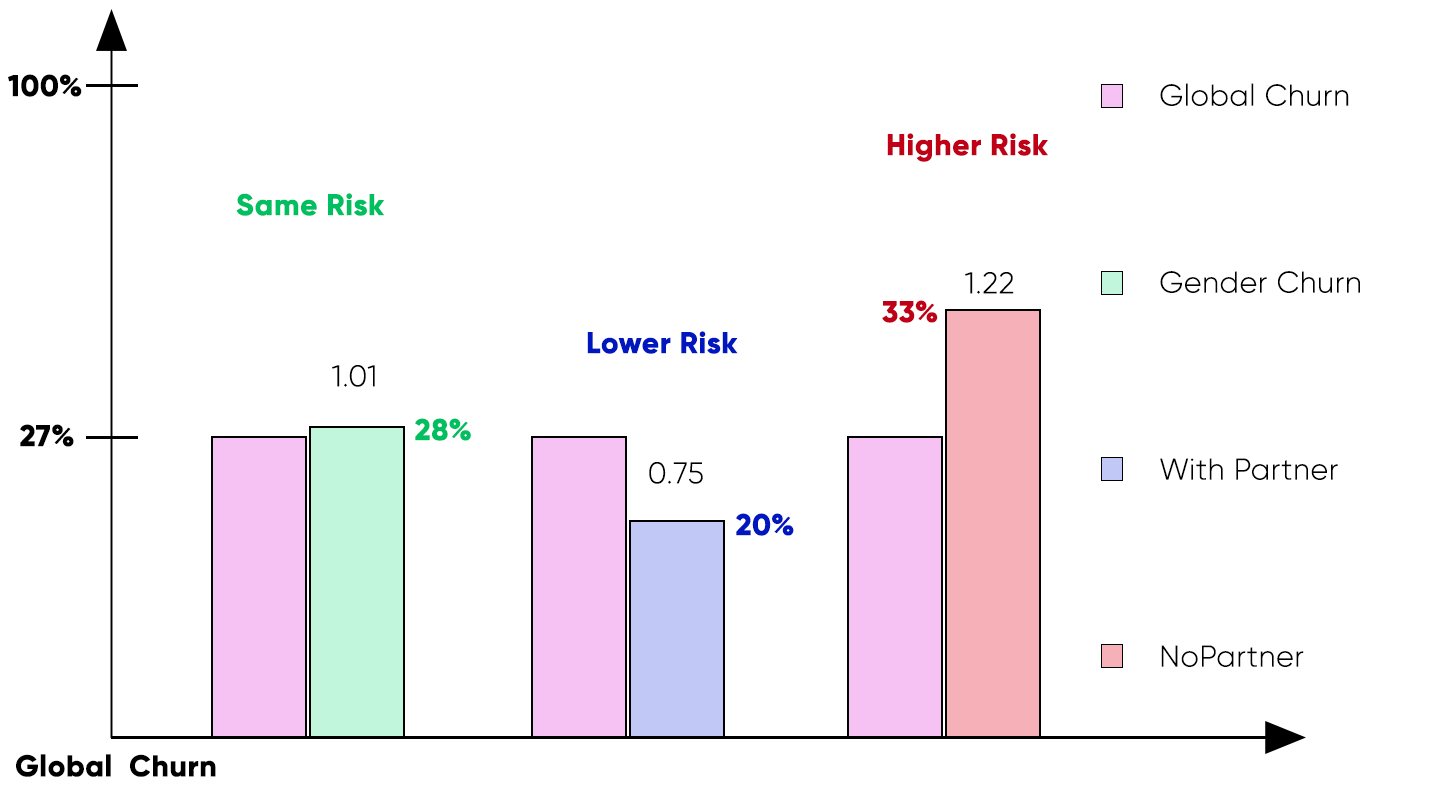

<font color='blue'>$\uparrow$$\uparrow$</font>   I have made a graphical visulization for better understandigs

# Feature Importance

I am importing sklearn's implicit method to know the importance of variable

In [56]:
from sklearn.metrics import mutual_info_score

In [57]:
mutual_info_score(df_full_train.churn, df_full_train.gender)

0.0001620761772512247

In [58]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.09901566414272059

To check the importance of every variable I am implementing a loop, as it is difficult to check one by one.

In [59]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [60]:
mutual_info=df_full_train[categorical].apply(mutual_info_churn_score)
mutual_info

gender              0.000162
seniorcitizen       0.008996
partner             0.008903
dependents          0.012709
phoneservice        0.000044
multiplelines       0.000841
internetservice     0.052373
onlinesecurity      0.061654
onlinebackup        0.042997
deviceprotection    0.041384
techsupport         0.057836
streamingtv         0.030897
streamingmovies     0.030317
contract            0.099016
paperlessbilling    0.016911
paymentmethod       0.035928
dtype: float64

I am sorting the values, so the important variales comes on top and the least important at the bottom

In [61]:
mutual_info.sort_values(ascending=False)

contract            0.099016
onlinesecurity      0.061654
techsupport         0.057836
internetservice     0.052373
onlinebackup        0.042997
deviceprotection    0.041384
paymentmethod       0.035928
streamingtv         0.030897
streamingmovies     0.030317
paperlessbilling    0.016911
dependents          0.012709
seniorcitizen       0.008996
partner             0.008903
multiplelines       0.000841
gender              0.000162
phoneservice        0.000044
dtype: float64

# <font color='blue'>Feature Importance: Correlation

I have checked the importance of idvidual variables now I am observing the correlation of each variable with churn variable.

It is dependency between varoables, let's two variable <font color='blue'>x <font color='black'>and <font color='blue'>y

<font color='black'>If <font color='blue'>x <font color='black'>goes up and <font color='blue'>y <font color='black'>goesup as well then it is <font color='orangered'>positive correlation <font color='black'>

if <font color='blue'>x <font color='black'>goes down and <font color='blue'>y <font color='black'>up & vice versa then it is <font color='orangered'>negative correlation

<font color='black'>For the positive correlation both values should be go up or down
    
Both the variables <font color='blue'>x <font color ='black'> and <font color='blue'>y <font color='black'> are real numbers and could contain any number but in my case <font color='blue'>y <font color='black'>is binary number and <font color='blue'>x <font color='black'> could be any number.
    
<font color='blue'>$y \in {0, 1}$           
<font color='black'>$x \in \mathbb{R}$

In [62]:
df_full_train[numeric].corrwith(df_full_train.churn)

tenure           -0.355962
monthlycharges    0.189665
totalcharges     -0.199645
dtype: float64

In [63]:
df_full_train[df_full_train.tenure <=2].churn.mean()

0.6030534351145038

In [64]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()

0.3945409429280397

In [65]:
df_full_train[(df_full_train.totalcharges > 10) & (df_full_train.totalcharges <= 20)].churn.mean()

0.36

In [66]:
df_full_train[(df_full_train.totalcharges > 20) & (df_full_train.totalcharges <= 50)].churn.mean()

0.49162011173184356

In [67]:
df_full_train[numeric].corrwith(df_full_train.churn).abs()

tenure            0.355962
monthlycharges    0.189665
totalcharges      0.199645
dtype: float64

# <font color='blue'>One-hot Encoding

Here I am assigning codes to non-numeric variables 

Means in place of yes or no I am assigning number 0 or 1. 

0 means no
while 1 means yes

In [68]:
from sklearn.feature_extraction import DictVectorizer

In [69]:
df_train[['gender', 'contract']].iloc[:10].to_dict()

{'gender': {0: 'female',
  1: 'male',
  2: 'female',
  3: 'female',
  4: 'female',
  5: 'male',
  6: 'male',
  7: 'female',
  8: 'female',
  9: 'female'},
 'contract': {0: 'two_year',
  1: 'month-to-month',
  2: 'month-to-month',
  3: 'month-to-month',
  4: 'two_year',
  5: 'month-to-month',
  6: 'month-to-month',
  7: 'month-to-month',
  8: 'two_year',
  9: 'month-to-month'}}

In [70]:
dicts=df_train[['gender', 'contract']].iloc[:10].to_dict(orient='records')
dicts

[{'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'},
 {'gender': 'female', 'contract': 'month-to-month'}]

In [71]:
dv = DictVectorizer(sparse=False)
dv.fit(dicts)
dv.transform(dicts)


array([[0., 1., 1., 0.],
       [1., 0., 0., 1.],
       [1., 0., 1., 0.],
       [1., 0., 1., 0.],
       [0., 1., 1., 0.],
       [1., 0., 0., 1.],
       [1., 0., 0., 1.],
       [1., 0., 1., 0.],
       [0., 1., 1., 0.],
       [1., 0., 1., 0.]])

In [72]:
dv.get_feature_names()

['contract=month-to-month',
 'contract=two_year',
 'gender=female',
 'gender=male']

In [73]:
train_dicts = df_train[categorical + numeric].to_dict(orient='records')
train_dicts[0]

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'yes',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'two_year',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 72,
 'monthlycharges': 115.5,
 'totalcharges': 8425.15}

In [74]:
dv = DictVectorizer(sparse=False)
dv.fit(dicts)
dv.get_feature_names()
list(dv.transform(dicts[:5])[0])

[0.0, 1.0, 1.0, 0.0]

In [75]:
#Lets write this for the training
X_train = dv.transform(train_dicts)
X_train.shape

(4225, 4)

In [76]:
X_train = dv.fit_transform(train_dicts)
X_train.shape

(4225, 45)

In [77]:


# Same for Validation 
val_dicts = df_val[categorical + numeric].to_dict(orient='records')

In [78]:
X_val =dv.transform(val_dicts)
X_val.shape

(1409, 45)

# <font color='blue'>Logistic Regression

In [79]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [80]:
z = np.linspace(-5, 5, 51)

In [81]:
sigmoid(z)

array([0.00669285, 0.00816257, 0.0099518 , 0.01212843, 0.01477403,
       0.01798621, 0.02188127, 0.02659699, 0.03229546, 0.03916572,
       0.04742587, 0.05732418, 0.06913842, 0.0831727 , 0.09975049,
       0.11920292, 0.14185106, 0.16798161, 0.19781611, 0.23147522,
       0.26894142, 0.31002552, 0.35434369, 0.40131234, 0.450166  ,
       0.5       , 0.549834  , 0.59868766, 0.64565631, 0.68997448,
       0.73105858, 0.76852478, 0.80218389, 0.83201839, 0.85814894,
       0.88079708, 0.90024951, 0.9168273 , 0.93086158, 0.94267582,
       0.95257413, 0.96083428, 0.96770454, 0.97340301, 0.97811873,
       0.98201379, 0.98522597, 0.98787157, 0.9900482 , 0.99183743,
       0.99330715])

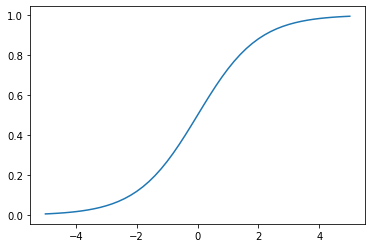

In [82]:
plt.plot(z, sigmoid(z))

#### <font color='green'>Logistic regression is similar to linear but the difference is sigmoid function

In [83]:
# Logistic Regression

def logistic_regression(xi):
    score = w0
    for j in range(len(w)):
        score = score+xi[j]*w[j]
    result = sigmoid(score)
    return result

In [84]:
from sklearn.linear_model import LogisticRegression

In [85]:
model = LogisticRegression()

In [86]:
model.fit(X_train, y_train)

C:\Users\Israr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [87]:

model.intercept_[0]

-0.10905156302020032

In [88]:
model.coef_[0].round(3)

array([ 0.474, -0.175, -0.407, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.316, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.071, -0.059,  0.141,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.214, -0.089, -0.232, -0.07 ,  0.   ])

In [89]:
model.predict(X_train)

array([0, 1, 1, ..., 1, 0, 1])

In [90]:
y_pred = model.predict_proba(X_val)[:, 1]

In [91]:
churn_decision = y_pred >=0.5
churn_decision

array([False, False, False, ..., False,  True,  True])

In [92]:
df_val[churn_decision].customerid

3       8433-wxgna
8       3440-jpscl
11      2637-fkfsy
12      7228-omtpn
19      6711-fldfb
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 311, dtype: object

In [93]:
(y_val == churn_decision).mean()

0.8034066713981547

In [94]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val

In [95]:
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [96]:
df_pred

,probability,prediction,actual,correct
0,0.008985,0,0,True
1,0.204378,0,0,True
2,0.212130,0,0,True
3,0.543022,1,1,True
4,0.213722,0,0,True
...,...,...,...,...
1404,0.313331,0,0,True
1405,0.039314,0,1,False
1406,0.136270,0,0,True
1407,0.799706,1,1,True


In [97]:
df_pred.correct.astype('int').mean()

0.8034066713981547

In [98]:
churn_decision.astype(int)

array([0, 0, 0, ..., 0, 1, 1])

# <font color='blue'>Model Interpretation

In [99]:
dv.get_feature_names()

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

In [100]:
model.coef_[0].round(3)

array([ 0.474, -0.175, -0.407, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.316, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.071, -0.059,  0.141,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.214, -0.089, -0.232, -0.07 ,  0.   ])

In [101]:
dict(zip(dv.get_feature_names(), model.coef_[0].round(3)))

{'contract=month-to-month': 0.474,
 'contract=one_year': -0.175,
 'contract=two_year': -0.407,
 'dependents=no': -0.03,
 'dependents=yes': -0.078,
 'deviceprotection=no': 0.063,
 'deviceprotection=no_internet_service': -0.089,
 'deviceprotection=yes': -0.081,
 'gender=female': -0.034,
 'gender=male': -0.073,
 'internetservice=dsl': -0.335,
 'internetservice=fiber_optic': 0.316,
 'internetservice=no': -0.089,
 'monthlycharges': 0.004,
 'multiplelines=no': -0.258,
 'multiplelines=no_phone_service': 0.141,
 'multiplelines=yes': 0.009,
 'onlinebackup=no': 0.063,
 'onlinebackup=no_internet_service': -0.089,
 'onlinebackup=yes': -0.081,
 'onlinesecurity=no': 0.266,
 'onlinesecurity=no_internet_service': -0.089,
 'onlinesecurity=yes': -0.284,
 'paperlessbilling=no': -0.231,
 'paperlessbilling=yes': 0.124,
 'partner=no': -0.166,
 'partner=yes': 0.058,
 'paymentmethod=bank_transfer_(automatic)': -0.087,
 'paymentmethod=credit_card_(automatic)': -0.032,
 'paymentmethod=electronic_check': 0.071,


In [102]:
small = ['contract', 'tenure', 'monthlycharges']

In [103]:
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [104]:
dicts_train_small = df_train[small].to_dict(orient='records')
dicts_val_small = df_val[small].to_dict(orient='records')

In [105]:
dv_small = DictVectorizer(sparse = False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [106]:
dv_small.get_feature_names()

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'monthlycharges',
 'tenure']

In [107]:
X_train_small = dv_small.transform(dicts_train_small)

In [108]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [109]:
w0=model_small.intercept_[0]
w0

-2.4767756612172627

In [110]:
w=model_small.coef_[0]
w.round(3)

array([ 0.97 , -0.025, -0.949,  0.027, -0.036])

In [111]:
dict(zip(dv.get_feature_names(), w.round(3)))

{'contract=month-to-month': 0.97,
 'contract=one_year': -0.025,
 'contract=two_year': -0.949,
 'dependents=no': 0.027,
 'dependents=yes': -0.036}

In [112]:
sigmoid(-2.7)

0.06297335605699649

In [113]:
-2.7 + 0.97 + 60 * 0.027 + 24 *(-0.036)

-0.9740000000000002

In [114]:
sigmoid(_)

0.2740839357160023

# <font color='blue'>Using The Model

In [115]:
dicts_full_train = df_full_train[categorical + numeric].to_dict(orient='records')

In [116]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [117]:
y_full_train = df_full_train.churn.values

In [118]:
model = LogisticRegression()
model.fit(X_full_train, y_full_train)

C:\Users\Israr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [119]:
dicts_test = df_test[categorical + numeric].to_dict(orient='records')

In [120]:
X_test = dv.transform(dicts_test)

In [121]:
y_predd=model.predict_proba(X_test)[:, 1]

In [122]:
chur_d=(y_predd >=0.5)

In [123]:
(chur_d == y_test).mean()
# model accuracy

0.808374733853797

In [124]:
customer = dicts_test[-1]
customer

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 17,
 'monthlycharges': 104.2,
 'totalcharges': 1743.5}

In [125]:
XX_small = dv.transform([customer])
XX_small.shape

(1, 45)

In [126]:
model.predict_proba(XX_small)[0, 1]

0.6219923800543384

In [127]:
y_test[-1]

1

<font color='orangered'>Model predicted rightly that customer will churn